<a href="https://colab.research.google.com/github/Vatsalparsaniya/Deep_Learning/blob/master/Fashion_minist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# To determine which version you're using:
!pip show tensorflow

# For the current version: 
!pip install --upgrade tensorflow

# For a specific version:
# !pip install tensorflow==2.1.0

# For the latest nightly build:
# !pip install tf-nightly

Name: tensorflow
Version: 2.0.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: astor, keras-applications, gast, keras-preprocessing, google-pasta, opt-einsum, tensorflow-estimator, absl-py, wrapt, wheel, grpcio, protobuf, termcolor, six, numpy, tensorboard
Required-by: stable-baselines, magenta, fancyimpute
  Using cached https://files.pythonhosted.org/packages/85/d4/c0cd1057b331bc38b65478302114194bd8e1b9c2bbc06e300935c0e93d90/tensorflow-2.1.0-cp36-cp36m-manylinux2010_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/18/90/b77c328a1304437ab1310b463e533fa7689f4bfc41549593056d812fab8e/tensorflow_estimator-2.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/40/23/53ffe290341cd0855d595b0a2e7485932f473798af173bbe3a584b99bb06/tensorboard-2.1.

In [0]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [4]:
tf.__version__

'2.1.0'

Import database

In [0]:
minist_dataset = keras.datasets.fashion_mnist
(train_img , train_labels),(test_img,test_labels) = minist_dataset.load_data()

In [6]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

there are 10 classes in classification

In [7]:
print("train_labels : ", len(train_labels))
print("test_labels : ", len(test_labels))

train_labels :  60000
test_labels :  10000


In [8]:
print("train img shape : ",train_img.shape)
print("test img shape : ",test_img.shape)

train img shape :  (60000, 28, 28)
test img shape :  (10000, 28, 28)


now we need co connect each class to label name (according to misnist dacument classes are given below)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

show image

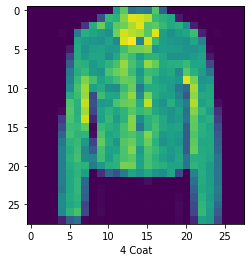

In [10]:
plt.figure()
plt.imshow(test_img[10])
plt.xlabel(str(test_labels[10])+" "+str(class_names[test_labels[10]]))
plt.show()

In [0]:
train_img = train_img / 255.0
test_img = test_img / 255.0

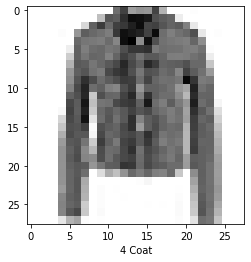

In [12]:
plt.figure()
plt.imshow(test_img[10],cmap= plt.cm.binary)
plt.xlabel(str(test_labels[10])+" "+str(class_names[test_labels[10]]))
plt.show()

Showing random 20 images with labels

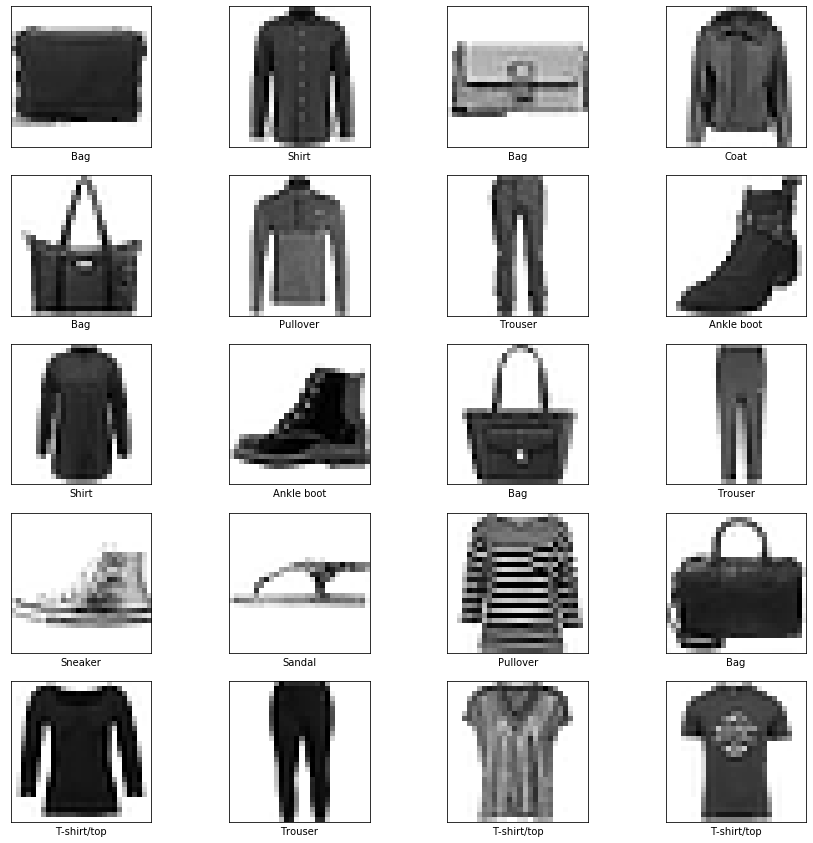

In [13]:
indexes = np.random.randint(low=0, high=60000, size=20)
plt.figure(figsize=(15,15))
for i in range(len(indexes)):
  plt.subplot(5,4,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_img[indexes[i]], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[indexes[i]]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # transform image 28X28 to one-dimensional array = 784 
    keras.layers.Dense(128,
                       activation='relu'),  #  fully connected layer with 128 nodes or nurons with activation function relu
    keras.layers.Dense(10, 
                       activation='softmax') # fully connected layer with 10 nodes with activation function softmax , each node contains probablity
])

In [0]:
model.compile(optimizer='adam',                        # Optimizer : This is how the model is updated based on the data it sees and its loss function.
              loss='sparse_categorical_crossentropy',  # Loss function : This measures how accurate the model is during training.
              metrics=['accuracy'])                    # Metrics —Used to monitor the training and testing steps. The following example uses accuracy

In [16]:
model.fit(train_img, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 83us/sample - loss: 0.4961 - accuracy: 0.8261
Epoch 2/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3775 - accuracy: 0.8631
Epoch 3/10
60000/60000 [==============================] - 5s 79us/sample - loss: 0.3376 - accuracy: 0.8764
Epoch 4/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3120 - accuracy: 0.8854
Epoch 5/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2975 - accuracy: 0.8898
Epoch 6/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2812 - accuracy: 0.8968
Epoch 7/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2677 - accuracy: 0.9012
Epoch 8/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2586 - accuracy: 0.9034
Epoch 9/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2499 - accuracy: 0.9064
Epoch 10/10
60

accuracy: 0.9099

In [17]:
test_loss , test_acc = model.evaluate(test_img,test_labels)
print("test_acc : ",test_acc)
print("test_loss : ", test_loss)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.3316 - accuracy: 0.8823
test_acc :  0.8823
test_loss :  0.3315833214998245


test_acc :  0.8862

Make **predictions**

In [36]:
prediction = model.predict(test_img[0:100])
print(prediction)

[[8.65296741e-08 6.60527270e-14 2.94498703e-10 2.43667291e-11
  3.50640583e-08 8.52024168e-05 1.74471804e-09 2.11643730e-03
  5.90328497e-09 9.97798324e-01]
 [6.43283201e-05 1.23605485e-14 9.98279810e-01 1.51207588e-11
  1.34197099e-03 1.36578853e-15 3.13901197e-04 1.66173657e-18
  1.07154474e-09 1.22073326e-12]
 [1.07703076e-10 1.00000000e+00 3.17315550e-14 7.45996487e-10
  8.15281696e-12 3.92572031e-15 6.80506389e-12 4.08021863e-23
  1.21055408e-15 8.99491465e-22]
 [2.46145593e-08 9.99998331e-01 2.32875108e-10 1.68040265e-06
  3.28908167e-09 1.99909412e-11 1.70683254e-08 3.05154186e-18
  3.38236232e-12 1.01506377e-16]
 [1.03303388e-01 6.53585994e-06 3.01840529e-02 1.59101561e-03
  3.38301286e-02 1.48089148e-05 8.30939114e-01 1.50141073e-08
  1.30592351e-04 3.31311128e-07]
 [1.74749232e-07 9.99999762e-01 2.35439890e-10 4.87729359e-08
  4.35206582e-09 1.76789208e-11 3.32109309e-08 3.13929808e-18
  2.63890607e-13 4.55983988e-16]
 [2.19796766e-06 5.11137763e-08 5.14904619e-04 1.28832494e

show first prediction

In [37]:
prediction[0]

array([8.6529674e-08, 6.6052727e-14, 2.9449870e-10, 2.4366729e-11,
       3.5064058e-08, 8.5202417e-05, 1.7447180e-09, 2.1164373e-03,
       5.9032850e-09, 9.9779832e-01], dtype=float32)

In [38]:
np.argmax(prediction[0])

9

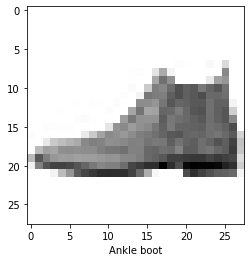

In [39]:
plt.figure()
plt.imshow(test_img[0],cmap=plt.cm.binary)
plt.xlabel(class_names[np.argmax(prediction[0])])
plt.show()

In [0]:
def plot_image_fun(i,prediction_array,true_label,img,classes_name):
    plt.figure(figsize=(10,5))
    plt.grid(False)
    colors_val = []
    for i in range(10):
      if i == true_label:
        colors_val.append('blue')
      else:
        colors_val.append('gray')
    y_pos = np.arange(len(prediction_array))
    plt.subplot(1,2,1)
    plt.imshow(img,cmap = plt.cm.binary)
    plt.xlabel(classes_name[true_label])
    plt.subplot(1,2,2)
    plt.bar(y_pos, prediction_array, color=colors_val)
    plt.xticks(y_pos,classes_name,rotation = 45)
    # pridiction_label = np.argmex(prediction_array)
    plt.show()

[4.3022390e-02 2.0213628e-02 8.7653816e-01 2.5181814e-06 3.7931036e-02
 1.3896529e-07 2.2126010e-02 8.4209582e-08 1.6592165e-04 1.6118503e-07]


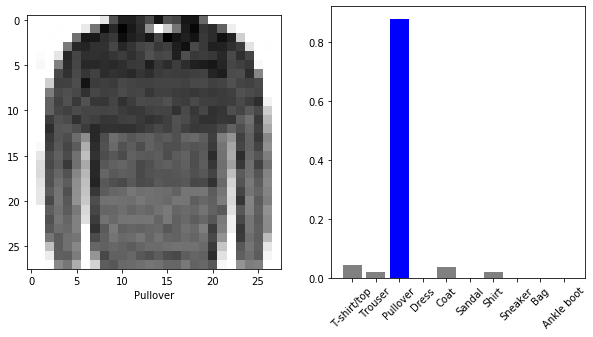

In [71]:
index_plot = 20
img = np.expand_dims(test_img[index_plot],0)
prediction = model.predict(img)
plot_image_fun(index_plot,prediction[0],test_labels[index_plot],test_img[index_plot],class_names)

True Prediction

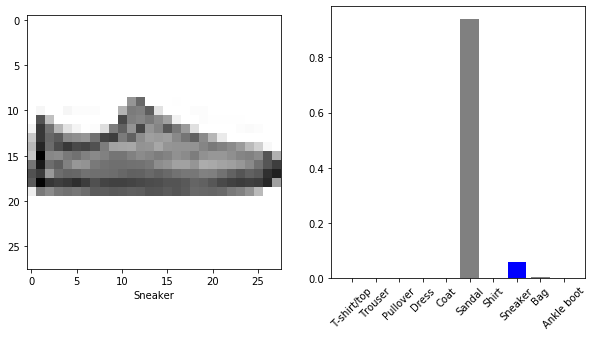

In [72]:
index_plot = 12
img = np.expand_dims(test_img[index_plot],0)
prediction = model.predict(img)
plot_image_fun(index_plot,prediction[0],test_labels[index_plot],test_img[index_plot],class_names)

false prediction